In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [65]:
sales=pd.read_csv('data_set/kc_house_data.csv')
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## 1. 
 The ‘get_numpy_data’ function (or equivalent) that takes a dataframe, a list of features (e.g. [‘sqft_living’, ‘bedrooms’]), to be used as inputs, and a name of the output (e.g. ‘price’). This function returns a ‘feature_matrix’ (2D array) consisting of first a column of ones followed by columns containing the values of the input features in the data set in the same order as the input list. It alsos return an ‘output_array’ which is an array of the values of the output in the data set (e.g. ‘price’)

In [66]:
def get_numpy_data(data_set,features,output):
    data_set['constant']=1
    features=['constant']+features
    feature_matrix=np.array(data_set[features])
    output_array=np.array(data_set[output])
    return (feature_matrix,output_array)

In [67]:
# Accepts 2D array 'feature_matrix' and 1D array 'weights' and returns 'prediction'
def predict_output(feature_matrix,weights):
    predictions=np.dot(feature_matrix,weights)
    return predictions

## 2.
Compute the derivative of the regression cost function. Recall that the cost function is the sum over the data points of the squared difference between an observed output and a predicted output, plus the L2 penalty term.

$\Delta$= -2G$^{T}$(Y-G$\theta$) + 2$\lambda\theta$

## 3.
 With this in mind write the derivative function which computes the derivative of the weight given the value of the feature (over all data points) and the errors (over all data points). To decide when to we are dealing with the constant (so we don't regularize it) we added the extra parameter to the call ‘feature_is_constant’ which you should set to True when computing the derivative of the constant and False otherwise.

In [68]:
def feature_derivative_ridge(errors,feature,weight,l2_penalty,feature_is_constant):
    val1=2*np.dot(errors,feature)
    val2=2*l2_penalty*weight
    derivative=val1+val2
    return derivative
    

#### Testing the above function

In [69]:
(example_features,example_output)=get_numpy_data(sales,['sqft_living'],'price')

In [70]:
example_output.shape , example_features.shape

((21613,), (21613, 2))

In [71]:
my_weights=np.array([1.,10.])
my_weights.shape

(2,)

In [72]:
test_predictions=predict_output(example_features,my_weights)

In [73]:
errors=test_predictions - example_output

In [74]:
errors.shape

(21613,)

In [75]:
feature_derivative_ridge(errors,example_features[:,1],my_weights[1],1,False)

-56554166815950.0

In [76]:
print(np.sum(errors*example_features[:,1])*2+20)

-56554166815950.0


## 4.
Write a gradient descent function using your derivative function above. For each step in the gradient descent, we update the weight for each feature before computing our stopping criteria. The function will take the following parameters:

1. 2D feature matrix
2. array of output values
3. initial weights
4. step size
5. L2 penalty
6. maximum number of iterations

In [77]:
def ridge_regression_gradient_descent(feature_matrix,output,initial_weights,step_size,l2_penalty,max_iterations=100):
    weights=np.array(initial_weights)
    for ite in range(1,max_iterations):
        predictions=predict_output(feature_matrix,weights)
        errors=predictions - output
        for i in range(0,len(weights)):
            derivative=feature_derivative_ridge(errors,feature_matrix[:,i],weights[i],l2_penalty,False)
            weights[i]=weights[i]-step_size*derivative
            
    return weights

In [78]:
print(feature_derivative_ridge(errors, example_features[:,0], my_weights[0], 1, True))
print(np.sum(errors)*2)

-22446749328.0
-22446749330.0


## 5.
 The L2 penalty gets its name because it causes weights to have small L2 norms than otherwise. Let's see how large weights get penalized. Let us consider a simple model with 1 feature.

In [79]:
train_data=pd.read_csv('data_set/kc_house_train_data.csv')
test_data=pd.read_csv('data_set/kc_house_test_data.csv')

In [80]:
simple_feature=['sqft_living']
my_output='price'
simple_feature_matrix,output=get_numpy_data(train_data,simple_feature,my_output)
simple_test_feature_matrix,test_output=get_numpy_data(test_data,simple_feature,my_output)

## 6.
First, let’s consider no regularization. Set the L2 penalty to 0.0 and run your ridge regression algorithm to learn the weights of the simple model (described above). Use the following parameters:

In [81]:
step_size=1e-12
max_iterations=1000
initial_weights=np.array([0.,0.])
l2_penalty=0
simple_weights_0_penalty=ridge_regression_gradient_descent(simple_feature_matrix,output,initial_weights,step_size,l2_penalty,max_iterations)

In [82]:
simple_weights_0_penalty

array([-1.62844700e-01,  2.63024369e+02])

## 7.
Next, let’s consider high regularization. Set the L2 penalty to 1e11 and run your ridge regression to learn the weights of the simple model. Use the same parameters as above. Call your weights:

In [83]:
l2_penalty=1e11
simple_weights_high_penalty=ridge_regression_gradient_descent(simple_feature_matrix,output,initial_weights,step_size,l2_penalty,max_iterations)

In [84]:
simple_weights_high_penalty[1]

124.57402057376612

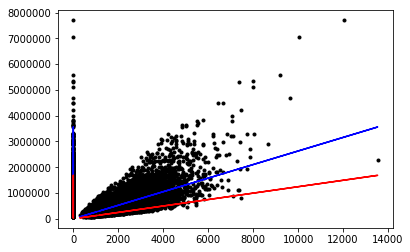

In [85]:
plt.plot(simple_feature_matrix,output,'k.',
        simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_0_penalty),'b-',
        simple_feature_matrix,predict_output(simple_feature_matrix, simple_weights_high_penalty),'r-')

### Quiz Question: What is the value of the coefficient for sqft_living that you learned with no regularization, rounded to 1 decimal place? What about the one with high regularization?

In [86]:
simple_weights_0_penalty[1]

263.02436885735654

## 8.
Compute the RSS on the TEST data for the following three sets of weights

In [87]:
def rss_values(output,predictions):
    errors=(output-predictions)**2
    errors=errors.sum(axis=0)
    return errors

In [88]:
predictions=predict_output(simple_test_feature_matrix,initial_weights)

#### RSS for initial weight

In [89]:
rss_initial_weights=rss_values(test_output,predictions)
rss_initial_weights

1784273286136298.0

#### RSS for no regularisation weights

In [90]:
predictions=predict_output(simple_test_feature_matrix,simple_weights_0_penalty)
rss_0_weights=rss_values(test_output,predictions)
rss_0_weights

275723632163972.25

#### RSS for high regularisation weights

In [91]:
predictions=predict_output(simple_test_feature_matrix,simple_weights_high_penalty)
rss_high_weights=rss_values(test_output,predictions)
rss_high_weights

694654309578539.5

## 9.
 Let us now consider a model with 2 features: [ ‘sqft_living’, ‘sqft_living_15’]. First, create Numpy version of your training and test data with the two features

In [92]:
model_features=['sqft_living','sqft_living15']
feature_matrix,output=get_numpy_data(train_data,model_features,my_output)
test_feature_matrix,test_output=get_numpy_data(test_data,model_features,my_output)

### No Regularisation

In [93]:
initial_weights=np.array([0.,0.,0.])
step_size=1e-12
max_iterations=1000
l2_penalty=0.0
multiple_weights_0_penalty=ridge_regression_gradient_descent(feature_matrix,output,initial_weights,step_size,l2_penalty,max_iterations)

In [94]:
multiple_weights_0_penalty

array([ -0.35706251, 243.05260393,  22.41651518])

### High Regularisation

In [95]:
initial_weights=np.array([0.,0.,0.])
step_size=1e-12
max_iterations=1000
l2_penalty=1e11
multiple_weights_high_penalty=ridge_regression_gradient_descent(feature_matrix,output,initial_weights,step_size,l2_penalty,max_iterations)

In [96]:
multiple_weights_high_penalty

array([3.36011655e-02, 9.14901676e+01, 7.84374903e+01])

### Quiz Question: What is the value of the coefficient for ‘sqft_living’ that you learned with no regularization, rounded to 1 decimal place? What about the one with high regularization?

In [97]:
multiple_weights_0_penalty[1],multiple_weights_high_penalty[1]

(243.05260393007472, 91.49016757487809)

### RSS Values

#### RSS for 0 weights

In [98]:
predictions=predict_output(test_feature_matrix,initial_weights)
rss_initial_weights=rss_values(test_output,predictions)
rss_initial_weights

1784273286136298.0

#### RSS for no Regularisaton

In [99]:
predictions=predict_output(test_feature_matrix,multiple_weights_0_penalty)
rss_0_weights=rss_values(test_output,predictions)
rss_0_weights

274067539412030.3

#### RSS for high Regularisation

In [100]:
predictions=predict_output(test_feature_matrix,multiple_weights_high_penalty)
rss_high_weights=rss_values(test_output,predictions)
rss_high_weights

500408530236718.4

## 10.
Predict the house price for the 1st house in the test set using the no regularization and high regularization models. 

In [101]:
test_data.iloc[0]

id                     114101516
date             20140528T000000
price                     310000
bedrooms                       3
bathrooms                      1
sqft_living                 1430
sqft_lot                   19901
floors                       1.5
waterfront                     0
view                           0
condition                      4
grade                          7
sqft_above                  1430
sqft_basement                  0
yr_built                    1927
yr_renovated                   0
zipcode                    98028
lat                      47.7558
long                    -122.229
sqft_living15               1780
sqft_lot15                 12697
constant                       1
Name: 0, dtype: object

In [102]:
test0_feature,test0_price=get_numpy_data(test_data.iloc[0],['sqft_living','sqft_living15'],'price')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [103]:
test0_feature,test0_price

(array([1, 1430, 1780], dtype=object), array(310000.))

In [104]:
test0_predict=predict_output(test0_feature,multiple_weights_0_penalty)
test0_predict

387466.2635739255

In [105]:
test0_predict_reg=predict_output(test0_feature,multiple_weights_high_penalty)
test0_predict_reg

270449.7060277028

### Quiz Question: What's the error in predicting the price of the first house in the test set using the weights learned with no regularization? What about with high regularization?

In [106]:
rss_noreg=rss_values(test0_price,test0_predict)
rss_noreg

6001021992.104893

In [107]:
rss_reg=rss_values(test0_price,test0_predict_reg)
rss_reg

1564225753.29513